In [1]:


#%%
import os
import sys
import json
from argparse import ArgumentParser
import yaml
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt
# personal files
import models
from datasets import MelDataset, vctkDataset, greatbirdDataset


os.chdir('/mnt/work/')
# ------------------------------------------------------------------------
# config loading
# data_config_path = "./Animal/configs/greatbird/dataset_greatbird.yaml"
data_config_path = "./Animal/configs/greatbird/dataset_greatbird_chunk.yaml"


# model path
model_config_path = "./Animal/configs/greatbird/model_greatbird_one_8.yaml"
model_path = './Animal/output/greatbird'

# model name
## (9154, 23)
## embedding yes
# ------------------------------------------------------------------------
# exp_name = 'VAEbase_one-greatbird_one_1-c_10.0_40.0-i_0.0_0.0'
# checkpoint = "100000.pth.tar"
# key_posi = [10, 18, 22, 23, 24, 29, 34, 41, 44, 56, 57, 61, 63, 85, 87, 90, 92, 96, 116, 118, 121, 122, 127]
# ------------------------------------------------------------------------
# exp_name = 'VAEbase_one-greatbird_one_1-c_10.0_0.0-i_0.0_0.0'
# checkpoint = "100000.pth.tar"
# ------------------------------------------------------------------------
# exp_name = 'VAEbase_one-greatbird_one_8-c_10.0_0.0-i_0.0_0.0'
# checkpoint = "200000.pth.tar"
# ------------------------------------------------------------------------
exp_name = 'VAEbase_one-greatbird_one_9-c_10.0_0.0-i_0.0_0.0'
checkpoint = "200000.pth.tar"
# device
torch.cuda.set_device(1)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"
# ------------------------------------------------------------------------

# dataset vctk
dataset_config = yaml.load(open(data_config_path, "r"), Loader=yaml.FullLoader)
analy_set = greatbirdDataset(dataset_config, subset='test')
# analy_set = greatbirdDataset(dataset_config, subset='train')

analy_loader = DataLoader(analy_set, batch_size=1, shuffle=False)

# model loading
model_config = yaml.load(open(model_config_path, "r"), Loader=yaml.FullLoader)
model_name = model_config['model_name']
model_type = getattr(models, model_name) # model choose
model = model_type(model_config, device).to(device) # model config load

#load model
save_path = os.path.join(model_path, exp_name, 'checkpoint', checkpoint)
ckpt = torch.load(save_path)
model.load_state_dict(ckpt["model"])
model.eval()

# data store
total_z_indi_mu = []
total_z_indi_log_std = []
total_z_indi = []

total_z_con_mu = []
total_z_con_log_std = []
total_z_con = []

total_x_gt = [] # mel
total_x_rec = [] # reconstuct mel
total_cID = []
total_ctID = []

total_key_indi_mu = []

for mel, lenx, indi_mel, cID, cID_type in tqdm(analy_loader):
        mel = mel.to(device)
        lenx = lenx.to(device)
        indi_mel = indi_mel.to(device)
        
        outputs = model(mel, lenx, indi_mel) 
        
        z_indi_mu = outputs['indi_mu'].detach().cpu().numpy()
        z_indi_log_std = outputs['indi_log_std'].detach().cpu().numpy()
        z_indi = outputs['z_indi'].detach().cpu().numpy() 
                
        z_con_mu = outputs['con_mu'].detach().cpu().numpy() 
        z_con_log_std = outputs['con_log_std'].detach().cpu().numpy() 
        z_con = outputs['z_con'].detach().cpu().numpy() 
        x_rec = outputs['x_rec'].detach().cpu().numpy() 
        
        total_z_indi_mu.append(z_indi_mu)
        # extracte key position of total_z_indi_mu [:,11] 
        # total_key_indi_mu.append([z_indi_mu[:,i] for i in key_posi])
        
        total_z_indi_log_std.append(z_indi_log_std)
        total_z_indi.append(z_indi)
        total_z_con_mu.append(z_con_mu)
        total_z_con_log_std.append(z_con_log_std)
        total_z_con.append(z_con)
        
        total_x_gt.append(mel.detach().cpu().numpy())
        total_x_rec.append(x_rec)
        
        # print('cID',cID[0][1:])
        total_cID.append(cID[0])
        total_ctID.append(cID_type[0])
        
        
    
unique_elements, counts = np.unique(total_cID, return_counts=True)
times = 0
for element, count in zip(unique_elements, counts):
    times += 1
    print('cID_counts',f"{element}: {count}")
print('times',times)

unique_elements, counts = np.unique(total_ctID, return_counts=True)
for element, count in zip(unique_elements, counts):
    times += 1
    print('cID_counts',f"{element}: {count}")


dataset greatbird loading...


100%|██████████| 20018/20018 [02:49<00:00, 118.32it/s]

cID_counts B101: 144
cID_counts B165: 70
cID_counts B221: 73
cID_counts B39: 101
cID_counts B4: 177
cID_counts B57: 125
cID_counts B67: 115
cID_counts B98: 365
cID_counts C1: 35
cID_counts C10: 127
cID_counts C108: 102
cID_counts C109: 19
cID_counts C12: 15
cID_counts C16: 214
cID_counts C4: 184
cID_counts C47: 332
cID_counts C61A: 421
cID_counts EX10: 65
cID_counts EX19A: 128
cID_counts EX29: 14
cID_counts EX34: 267
cID_counts EX51: 49
cID_counts EX57: 161
cID_counts EX62: 229
cID_counts EX62E: 500
cID_counts EX62F: 489
cID_counts MP12: 666
cID_counts MP29: 64
cID_counts MP41: 148
cID_counts MP42: 704
cID_counts MP50: 44
cID_counts MP55: 1337
cID_counts MP57: 27
cID_counts MP61: 729
cID_counts MP64: 478
cID_counts MP65: 426
cID_counts MP76: 886
cID_counts MP78: 335
cID_counts O113: 32
cID_counts O21: 755
cID_counts O27A: 317
cID_counts O36: 446
cID_counts O48: 95
cID_counts O56: 211
cID_counts O6: 109
cID_counts O75D: 809
cID_counts O78: 368
cID_counts O82: 36
cID_counts O93: 64
cID_c

In [11]:
def print_model_parameters(model):
    for name, module in model.named_modules():
        # 计算当前模块的参数数量
        num_params = sum(p.numel() for p in module.parameters())
        if num_params > 0:
            print(f"{name}: {num_params} parameters")
             
print_model_parameters(model)

: 14448464 parameters
dynamicEncoder: 7174912 parameters
dynamicEncoder.conv_initial: 20736 parameters
dynamicEncoder.conv_layers: 789504 parameters
dynamicEncoder.conv_layers.0: 394752 parameters
dynamicEncoder.conv_layers.0.batch_norm0: 512 parameters
dynamicEncoder.conv_layers.0.conv1: 196864 parameters
dynamicEncoder.conv_layers.0.batch_norm1: 512 parameters
dynamicEncoder.conv_layers.0.conv2: 196864 parameters
dynamicEncoder.conv_layers.1: 394752 parameters
dynamicEncoder.conv_layers.1.batch_norm0: 512 parameters
dynamicEncoder.conv_layers.1.conv1: 196864 parameters
dynamicEncoder.conv_layers.1.batch_norm1: 512 parameters
dynamicEncoder.conv_layers.1.conv2: 196864 parameters
dynamicEncoder.out_batch_norm: 512 parameters
dynamicEncoder.layer_stack: 5773824 parameters
dynamicEncoder.layer_stack.0: 2886912 parameters
dynamicEncoder.layer_stack.0.slf_attn: 263680 parameters
dynamicEncoder.layer_stack.0.slf_attn.w_qs: 65792 parameters
dynamicEncoder.layer_stack.0.slf_attn.w_ks: 65792 p

In [2]:
used_label = total_ctID
unique_labels = np.unique(used_label)
print(len(unique_labels))

293


In [5]:
print(len(total_z_con_mu))
print(total_z_con_mu[4][0].shape)

20018
(128, 194)


In [6]:
from sklearn.manifold import TSNE

# call type
total_z_con_1D = []
for i in total_z_con_mu: # total_z_con; content miu: total_z_con_mu; content var: total_z_con_log_std
    total_z_con_1D.append(i.sum(2))
    # total_z_con_1D.append(i.mean(2))

# tsne
total_z_con_1D = np.array(total_z_con_1D).squeeze()
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 1000)

# print('total_z_con_1D',total_z_con_1D[0])

data_2d_con = tsne.fit_transform(total_z_con_1D) # cnontent

In [10]:
import pandas as pd

em_save = True
if em_save:
    ## save
    embed_save_path = os.path.join(model_path, exp_name, 'embedding')

    if not os.path.exists(embed_save_path):
        os.makedirs(embed_save_path)
        
    # data
    print(total_z_con_1D.shape)
    save_df = pd.DataFrame(total_z_con_1D)
    save_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'embedding.csv'), index=False, header=False)

    # caller label save
    caller_df = pd.DataFrame(total_cID)
    caller_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'caller_label.csv'), index=False, header=False)
    
    # caller type label save
    caller_type_df = pd.DataFrame(total_ctID) 
    caller_type_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'caller_type_label.csv'), index=False, header=False)



(20018, 128)


In [7]:
data_2d_con.shape

(20018, 2)

data choose from label (20018, 2)
label choose from label (1, 20018)
unique label choose from label (71,)


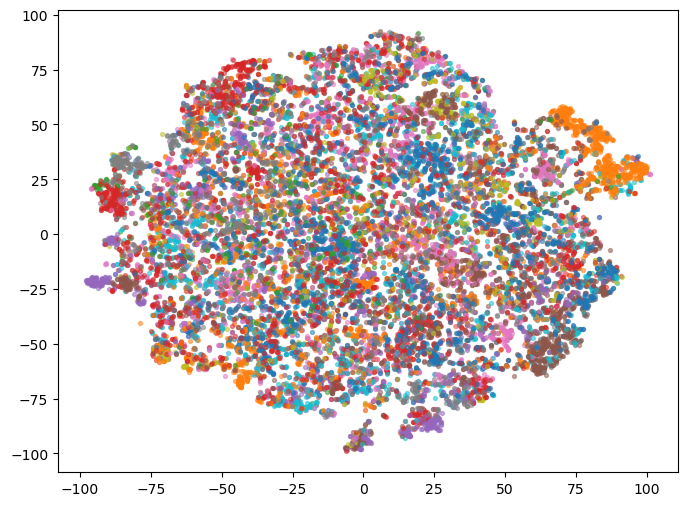

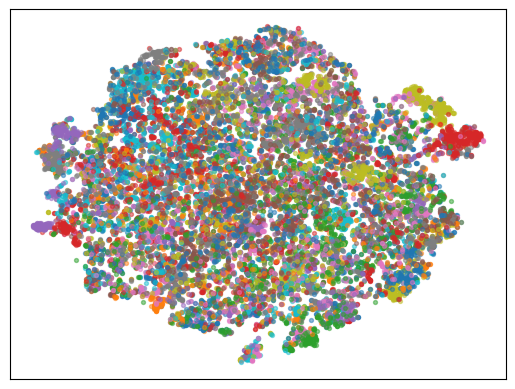

data choose from label (20018, 2)
label choose from label (1, 20018)
unique label choose from label (71,)


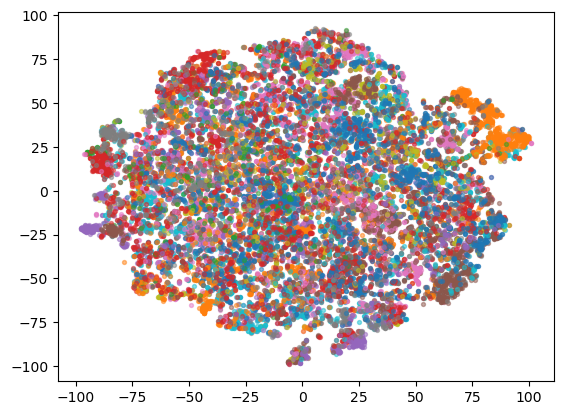

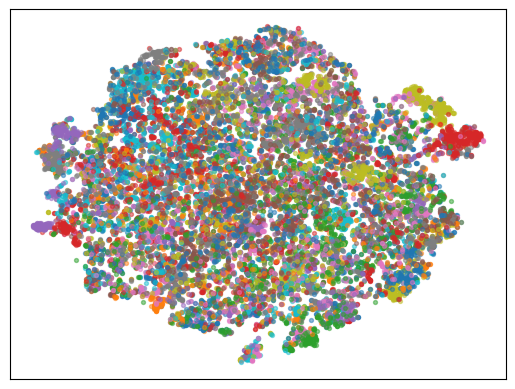

In [9]:

# Get unique labels
# caller
total_cID = np.array(total_cID)
used_label = np.expand_dims(total_cID, axis=0)

# caller_class
total_ctID = np.array(total_ctID)
caller_type_label = np.expand_dims(total_ctID, axis=0)
# ------------------------------------------------------------------------
# use data segment
# ran_data = True
ran_data = False
if ran_data:
    num_samples = 5000
    random.seed(0)
    rand = list(range(len(data_2d_con)))
    samples = random.sample(rand, num_samples)
    data_2d_con_seg = data_2d_con[samples,]
    used_label_seg = used_label[:,samples]
    unique_labels = np.unique(used_label_seg)
else:
    # not random choose data segment
    data_2d_con_seg = data_2d_con
    used_label_seg = used_label
    unique_labels = np.unique(used_label_seg)
    # print(data_2d_con.shape)
    # print(unique_labels.shape)
    # print(unique_labels)


# select data from data label
# random select
# num_label = 5
# num_label = 71


con_text = [False, False]
con_iter = iter(con_text) 

plt.figure(figsize=(8, 6))
for num_label in [71, 71]: 
    
    random.seed(0)
    rand_label_num = list(range(len(unique_labels)))
    rand_label = random.sample(rand_label_num, num_label)
    used_label_index = unique_labels[rand_label]

    # choose label
    # used_label_index = ['B101', 'B165',  'B221',  'B39',  'B4', 'B57']
    # ['B101' 'B165' 'B221' 'B39' 'B4' 'B57' 'B67' 'B98' 'C1' 'C10' 'C108'
    #  'C109' 'C12' 'C16' 'C4' 'C47' 'C61A' 'EX10' 'EX19A' 'EX29' 'EX34' 'EX51'
    #  'EX57' 'EX62' 'EX62E' 'EX62F' 'MP12' 'MP29' 'MP41' 'MP42' 'MP50' 'MP55'
    #  'MP57' 'MP61' 'MP64' 'MP65' 'MP76' 'MP78' 'O113' 'O21' 'O27A' 'O36' 'O48'
    #  'O56' 'O6' 'O75D' 'O78' 'O82' 'O93' 'P11' 'P6' 'SW1' 'SW102' 'SW114'
    #  'SW128' 'SW19' 'SW28' 'SW32' 'SW34' 'SW49' 'SW60' 'SW9' 'W103A' 'W17'
    #  'W18' 'W28' 'W35' 'W36' 'W67' 'W73' 'W80']

    # mask to selected data label
    mask = np.isin(used_label_seg, used_label_index)
    # print(mask)
    indices = np.where(mask)[1]
    # print(indices)
    data_spk_label = data_2d_con_seg[indices,]
    used_spk_label = used_label_seg[:,indices]
    used_spk_type_label = caller_type_label[:,indices]

    unique_spk_label = np.unique(used_spk_label)
    unique_spk_type_label = np.unique(used_spk_type_label)

    print('data choose from label',data_spk_label.shape)
    # print(data_spk_label)
    print('label choose from label',used_spk_label.shape)
    # print(used_spk_label)
    print('unique label choose from label',unique_spk_label.shape)
    # print(unique_spk_label)

    # paint index
    next_item = next(con_iter)
    
    
    for label in unique_spk_label:
        
        label_mask = np.all(used_spk_label == label, axis=0)
        
        # print('label',label)
        # print(label_mask)
        # Select data for this label
        data_for_label = data_spk_label[label_mask]
        
        # Plot the data for this label with a label for the legend
        plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

        # center prosition
        centroid = np.median(data_for_label, axis=0)
        # text label
        if next_item:
            plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

    # Add a legend
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
    
    plt.show()

    
    for label in unique_spk_type_label:
        label_mask = np.all(used_spk_type_label == label, axis=0)
        
        # print('label',label)
        # print(label_mask)
        # Select data for this label
        data_for_label = data_spk_label[label_mask]
        
        # Plot the data for this label with a label for the legend
        plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

        # center prosition
        centroid = np.median(data_for_label, axis=0)
        # text label
        if next_item:
            plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

    # Add a legend
    # plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
    
    ax = plt.gca()
    # 使用.tick_params()移除刻度线
    ax.tick_params(axis='both',          # 应用于x轴和y轴
                which='both',         # 应用于主刻度线和次刻度线
                bottom=False,         # 不显示x轴底部刻度线
                top=False,            # 不显示x轴顶部刻度线
                left=False,           # 不显示y轴左侧刻度线
                right=False,          # 不显示y轴右侧刻度线
                labelbottom=False,    # 不显示x轴刻度标签
                labelleft=False)  

    save_path = '/mnt/work/Animal/output/figs'
    plt.savefig(save_path+'/'+'VAE.pdf', format='pdf', bbox_inches='tight', edgecolor='none')
    

    plt.show()

In [ ]:
########################################################################

In [9]:
total_z_con_1D = []
total_len = []

for i in range(len(total_z_con_mu)):
    zeros = 200 - total_z_con_mu[i][0].shape[-1]
    # print(zeros)
    
    if zeros > 0:
        new = (total_z_con_mu[i][0][0]).tolist() + [0] * zeros
        new = np.array(new)
        # new = np.expand_dims(new, axis=0)
        # print('new',new.shape)
        total_z_con_1D.append(new)
        
print(len(total_z_con_1D))

# for i in range(len(total_z_con_mu)):
#     zeros = 200 - total_z_con_mu[i][0].shape[-1]
#     # print(zeros)
    
#     if zeros > 0:
#         new = (total_z_con_mu[i][0][0]).tolist() + [0] * zeros
#         new = np.array(new)
#         # new = np.expand_dims(new, axis=0)
#         # print('new',new.shape)
#         total_z_con_1D.append(new)
        
# print(len(total_z_con_1D))

9242


In [33]:
from sklearn.manifold import TSNE


total_z_con_1D = np.array(total_z_con_1D)
print('total_z_con_1D',total_z_con_1D.shape)

# tsne
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 1000)

# print('total_z_con_1D',total_z_con_1D[0])

data_2d_con = tsne.fit_transform(total_z_con_1D) # cnontent


total_z_con_1D (9154, 200)


data choose from label (9154, 2)
label choose from label (1, 9154)
unique label choose from label (71,)


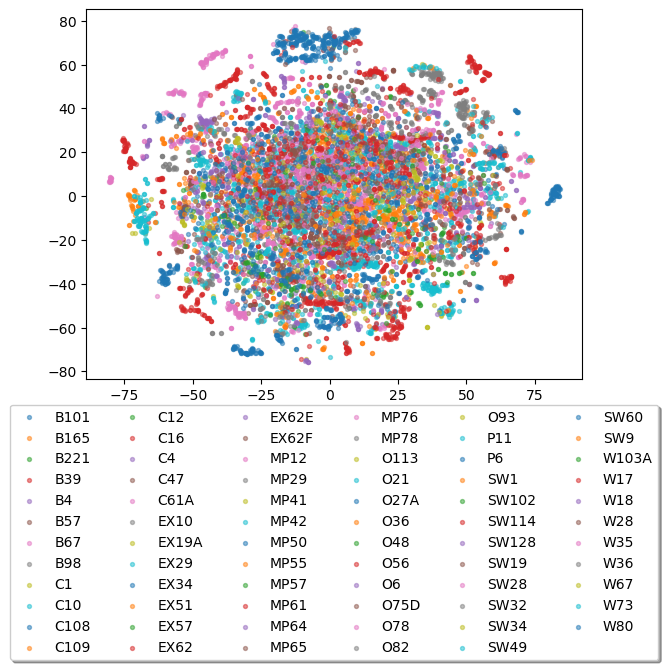

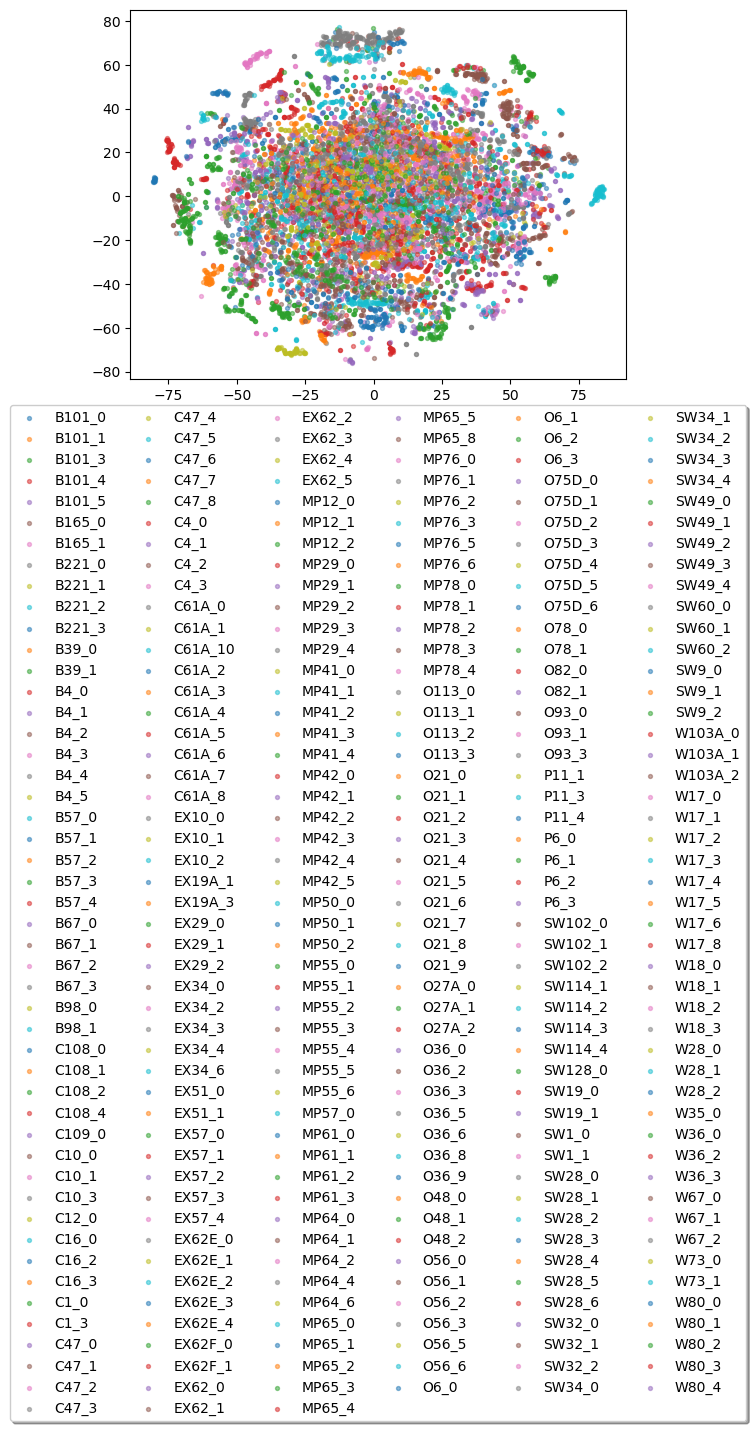

data choose from label (721, 2)
label choose from label (1, 721)
unique label choose from label (5,)


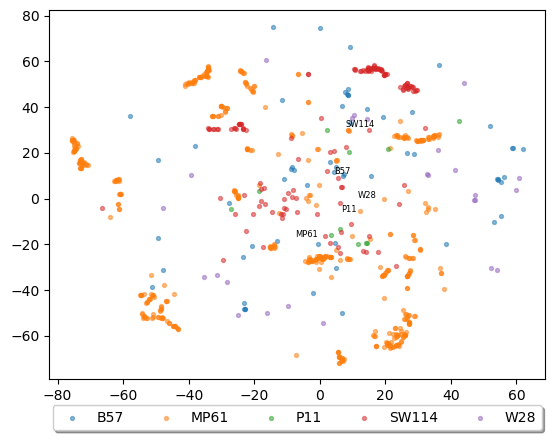

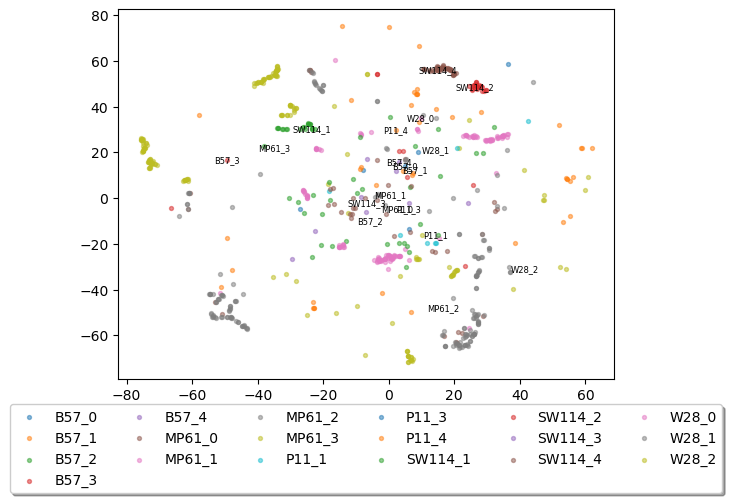

In [34]:

# Get unique labels
# caller
total_cID = np.array(total_cID)
used_label = np.expand_dims(total_cID, axis=0)

# caller_class
total_ctID = np.array(total_ctID)
caller_type_label = np.expand_dims(total_ctID, axis=0)
# ------------------------------------------------------------------------
# use data segment
# ran_data = True
ran_data = False
if ran_data:
    num_samples = 5000
    random.seed(0)
    rand = list(range(len(data_2d_con)))
    samples = random.sample(rand, num_samples)
    data_2d_con_seg = data_2d_con[samples,]
    used_label_seg = used_label[:,samples]
    unique_labels = np.unique(used_label_seg)
else:
    # not random choose data segment
    data_2d_con_seg = data_2d_con
    used_label_seg = used_label
    unique_labels = np.unique(used_label_seg)
    # print(data_2d_con.shape)
    # print(unique_labels.shape)
    # print(unique_labels)


# select data from data label
# random select
# num_label = 5
# num_label = 71


con_text = [False, True]
con_iter = iter(con_text) 

for num_label in [71, 5]: 
    
    random.seed(0)
    rand_label_num = list(range(len(unique_labels)))
    rand_label = random.sample(rand_label_num, num_label)
    used_label_index = unique_labels[rand_label]

    # choose label
    # used_label_index = ['B101', 'B165',  'B221',  'B39',  'B4', 'B57']
    # ['B101' 'B165' 'B221' 'B39' 'B4' 'B57' 'B67' 'B98' 'C1' 'C10' 'C108'
    #  'C109' 'C12' 'C16' 'C4' 'C47' 'C61A' 'EX10' 'EX19A' 'EX29' 'EX34' 'EX51'
    #  'EX57' 'EX62' 'EX62E' 'EX62F' 'MP12' 'MP29' 'MP41' 'MP42' 'MP50' 'MP55'
    #  'MP57' 'MP61' 'MP64' 'MP65' 'MP76' 'MP78' 'O113' 'O21' 'O27A' 'O36' 'O48'
    #  'O56' 'O6' 'O75D' 'O78' 'O82' 'O93' 'P11' 'P6' 'SW1' 'SW102' 'SW114'
    #  'SW128' 'SW19' 'SW28' 'SW32' 'SW34' 'SW49' 'SW60' 'SW9' 'W103A' 'W17'
    #  'W18' 'W28' 'W35' 'W36' 'W67' 'W73' 'W80']

    # mask to selected data label
    mask = np.isin(used_label_seg, used_label_index)
    # print(mask)
    indices = np.where(mask)[1]
    # print(indices)
    data_spk_label = data_2d_con_seg[indices,]
    used_spk_label = used_label_seg[:,indices]
    used_spk_type_label = caller_type_label[:,indices]

    unique_spk_label = np.unique(used_spk_label)
    unique_spk_type_label = np.unique(used_spk_type_label)

    print('data choose from label',data_spk_label.shape)
    # print(data_spk_label)
    print('label choose from label',used_spk_label.shape)
    # print(used_spk_label)
    print('unique label choose from label',unique_spk_label.shape)
    # print(unique_spk_label)

    # paint index
    next_item = next(con_iter)
    
    for label in unique_spk_label:
        label_mask = np.all(used_spk_label == label, axis=0)
        
        # print('label',label)
        # print(label_mask)
        # Select data for this label
        data_for_label = data_spk_label[label_mask]
        
        # Plot the data for this label with a label for the legend
        plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

        # center prosition
        centroid = np.median(data_for_label, axis=0)
        # text label
        if next_item:
            plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

    # Add a legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
    plt.show()


    for label in unique_spk_type_label:
        label_mask = np.all(used_spk_type_label == label, axis=0)
        
        # print('label',label)
        # print(label_mask)
        # Select data for this label
        data_for_label = data_spk_label[label_mask]
        
        # Plot the data for this label with a label for the legend
        plt.scatter(data_for_label[:, 0], data_for_label[:, 1], label=label, alpha=0.5, s=8)

        # center prosition
        centroid = np.median(data_for_label, axis=0)
        # text label
        if next_item:
            plt.text(centroid[0], centroid[1], str(label), fontsize=6, color='black', ha='center', va='center')

    # Add a legend
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=6)
    plt.show()

In [40]:
import pandas as pd

em_save = True
if em_save:
    ## save
    embed_save_path = os.path.join(model_path, exp_name, 'embedding')

    if not os.path.exists(embed_save_path):
        os.makedirs(embed_save_path)
        
    # data
    print(total_z_con_1D.shape)
    save_df = pd.DataFrame(total_z_con_1D)
    save_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'embedding.csv'), index=False, header=False)

    # caller label save
    caller_df = pd.DataFrame(total_cID)
    caller_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'caller_label.csv'), index=False, header=False)
    
    # caller type label save
    caller_type_df = pd.DataFrame(total_ctID) 
    caller_type_df.to_csv(os.path.join(model_path, exp_name, 'embedding', 'caller_type_label.csv'), index=False, header=False)



(9154, 128)
